In [165]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../scripts")
from utils import Utils
from clean_data import DataCleaner

cleaner = DataCleaner()
utility = Utils()

In [166]:
cleaned_df=utility.load_data("../data/cleaned_data.csv")
# since our csv file doesn't have a meta data of columns dtype, we manually convert ['bearer_id', 'imsi', 'msisdn/number', 'imei','handset_type'] to string once again
cleaned_df=cleaner.convert_to_string(cleaned_df)

In [167]:
cleaned_df.tail()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
149996,7.27782567019668e+18,2019-04-29 07:28:00,451.0000,2019-04-30 06:02:00,214.00000,81230.0,208202201200072.0,33650688697.0,35483109451938.0,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.34988326423461e+18,2019-04-29 07:28:00,483.0000,2019-04-30 10:41:00,187.00000,97970.0,208201908153249.0,33663449963.0,35660508296467.0,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.31144835733673e+19,2019-04-29 07:28:00,283.0000,2019-04-30 10:46:00,810.00000,98249.0,208201711161187.0,33621890103.0,35721209870907.0,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.31144835733673e+19,2019-04-29 07:28:00,696.0000,2019-04-30 10:40:00,327.00000,97910.0,208202101098075.0,33619622058.0,86186204011457.0,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08
150000,nan,2019-04-26 07:25:00,499.1882,2019-04-25 00:01:00,498.80088,86399.0,nan,nan,nan,D41377B,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08


In [168]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  object 
 1   start                                     150001 non-null  object 
 2   start_ms                                  150001 non-null  float64
 3   end                                       150001 non-null  object 
 4   end_ms                                    150001 non-null  float64
 5   dur._(ms)                                 150001 non-null  float64
 6   imsi                                      150001 non-null  object 
 7   msisdn/number                             150001 non-null  object 
 8   imei                                      150001 non-null  object 
 9   last_location_name                        150001 non-null  object 
 10  avg_rtt_dl_(ms)     

In [169]:
cleaned_df.isnull().sum()

bearer_id                                   0
start                                       0
start_ms                                    0
end                                         0
end_ms                                      0
dur._(ms)                                   0
imsi                                        0
msisdn/number                               0
imei                                        0
last_location_name                          0
avg_rtt_dl_(ms)                             0
avg_rtt_ul_(ms)                             0
avg_bearer_tp_dl_(kbps)                     0
avg_bearer_tp_ul_(kbps)                     0
tcp_dl_retrans._vol_(bytes)                 0
tcp_ul_retrans._vol_(bytes)                 0
dl_tp_<_50_kbps_(%)                         0
50_kbps_<_dl_tp_<_250_kbps_(%)              0
250_kbps_<_dl_tp_<_1_mbps_(%)               0
dl_tp_>_1_mbps_(%)                          0
ul_tp_<_10_kbps_(%)                         0
10_kbps_<_ul_tp_<_50_kbps_(%)     

In [170]:
cleaned_df.shape

(150001, 55)

# Task 1
### Top 10 handset types

In [171]:
cleaned_df["handset_type"].value_counts()[:10]

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: handset_type, dtype: int64

In [172]:
# pd.reset_option("display.max_columns")
# pd.reset_option("display.max_rows")

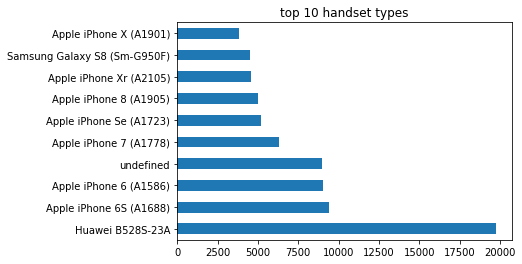

In [173]:
cleaned_df["handset_type"].value_counts()[:10].plot(kind="barh",title="top 10 handset types")
plt.show()

### Top 3 handset manufacturers

In [174]:
cleaned_df["handset_manufacturer"].value_counts()[:10]


Apple                                   60137
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: handset_manufacturer, dtype: int64

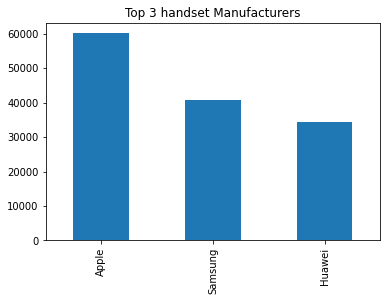

In [175]:
cleaned_df["handset_manufacturer"].value_counts()[:3].plot(kind="bar",title="Top 3 handset Manufacturers")
plt.show()

### Top 5 handsets per top 3 handset manufacturers


In [176]:
handsets_per_manufacturers=cleaned_df[cleaned_df["handset_manufacturer"].str.contains("Apple|Samsung|Huawei") ][["handset_manufacturer","handset_type"]]
handsets_per_manufacturers

,handset_manufacturer,handset_type
0,Samsung,Samsung Galaxy A5 Sm-A520F
1,Samsung,Samsung Galaxy J5 (Sm-J530)
2,Samsung,Samsung Galaxy A8 (2018)
4,Samsung,Samsung Sm-G390F
6,Huawei,Huawei Mate 20 Lite
...,...,...
149996,Apple,Apple iPhone 8 Plus (A1897)
149997,Apple,Apple iPhone Se (A1723)
149998,Apple,Apple iPhone Xs (A2097)
149999,Huawei,Huawei Fig-Lx1


In [177]:
list(handsets_per_manufacturers.groupby(["handset_manufacturer"]))[0][1]["handset_type"].value_counts()[:5]


Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: handset_type, dtype: int64

In [178]:
list(handsets_per_manufacturers.groupby(["handset_manufacturer"]))[1][1]["handset_type"].value_counts()[:5]


Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: handset_type, dtype: int64

In [179]:
list(handsets_per_manufacturers.groupby(["handset_manufacturer"]))[2][1]["handset_type"].value_counts()[:5]


Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: handset_type, dtype: int64

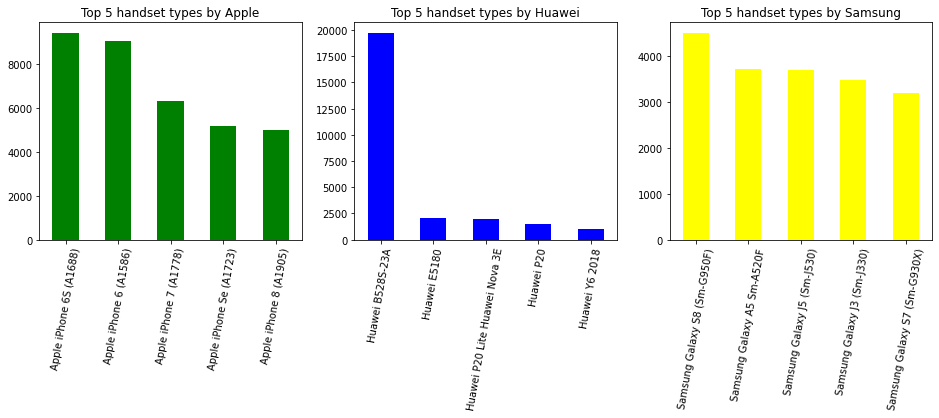

In [180]:
plt.subplots(1,3,figsize=(16,4))
plt.subplot(1,3,1)
handsets_per_manufacturers.groupby(["handset_manufacturer"]).get_group('Apple')["handset_type"].value_counts()[:5].plot(kind='bar',color="green",rot=80,title="Top 5 handset types by Apple")
plt.subplot(1,3,2)
handsets_per_manufacturers.groupby(["handset_manufacturer"]).get_group('Huawei')["handset_type"].value_counts()[:5].plot(kind='bar',color="blue",rot=80,title="Top 5 handset types by Huawei")
plt.subplot(1,3,3)
handsets_per_manufacturers.groupby(["handset_manufacturer"]).get_group('Samsung')["handset_type"].value_counts()[:5].plot(kind='bar',color="yellow",rot=80,title="Top 5 handset types by Samsung")


plt.show()

<b>Interpretation</b> <br/>
The top 3 handset manufacturers with many customers are Apple, Samsung, and Huawei. Regarding Apple, there are two major handset types leading the figure: Apple iPhone 6s and Apple iPhone 6 where as Apple iPhone 7, Apple iPhone Se, and Apple iPhone 8 accounts for a slightly lesser figure than that of iPhone 6. On the other hand Samsung has its handset types (the top 5 ones) somehow equally distributed while we notice a monopoly among Huawei handsets. Huawei B528S-23A accounts for being the majority type among the huawei customers.
<b>Recommendations</b> <br/>
The marketing team should target on services suitable for the three brands: Apple, Samsung, and Huawei. The market team has variety of options when focusing on Apple and Samsung because there are a number of types of handsets in each brand. However, regarding Huawei, the market team should specialize in services targeting Huawei B528S-23A

## Task 1.1 Aggregate per user infomations regarding
- number of xDR sessions
- Session duration
- total download and upload data
- total data volume in bytes during this session for each application


In [181]:
# if we are looking for data per user, we first have to identify unique users with some kinds of id. Here we have MSISDN which is a unique number given to each user. 
# there might be a posibility of one user using multiple sim cards but we will treat it as a separate users

print("we have "+ str(len(cleaned_df["msisdn/number"].unique()))+" unique users")

we have 106857 unique users


### number of xDR session

In [182]:
session=cleaned_df.groupby(["msisdn/number"]).agg({"bearer_id":"count"})

session.rename(columns={"bearer_id":"xDR_sessions"})
session=pd.DataFrame(data=list(session["bearer_id"])[1:],columns=["xDR_session"],index=session.index[1:])
session = session.sort_values(by=["xDR_session"],ascending=False)
session.drop(["nan"],axis=0,inplace=True)
session.head(10)


,xDR_session
msisdn/number,
33626320676.0,18
33614892860.0,17
33625779332.0,17
33659725664.0,16
33675877202.0,15
33760536639.0,15
33667163239.0,13
33603127838.0,12
33604515716.0,12


In [183]:
session.describe()

,xDR_session
count,106855.000000
mean,1.393795
std,0.806025
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


As clearly seen from the above data, even though xDR sessions range from 1 to 18, we have an average of 1.39 ≈ 1.4 xDR session per user. 

### total session duration

In [184]:
# duration with ms
cleaned_df[["dur._(ms)"]]

,dur._(ms)
0,1823652.0
1,1365104.0
2,1361762.0
3,1321509.0
4,1089009.0
...,...
149996,81230.0
149997,97970.0
149998,98249.0
149999,97910.0


In [185]:
duration = cleaned_df.groupby(["msisdn/number"]).agg({"dur._(ms)":"sum"})
duration.sort_values(by=["dur._(ms)"],ascending=False,inplace=True)
duration.drop(["nan"],axis=0,inplace=True)
duration=duration.rename(columns={"dur._(ms)":"total_duration(ms) "})
duration.head(10)

,total_duration(ms)
msisdn/number,
33625779332.0,18553754.0
33614892860.0,9966898.0
33760536639.0,9279434.0
33626320676.0,8791927.0
33667163239.0,8744914.0
33662840755.0,6614270.0
33664693736.0,6288730.0
33603127838.0,6287761.0
33667456716.0,5649882.0


In [186]:
duration.describe()

,total_duration(ms)
count,1.068560e+05
mean,1.461672e+05
std,1.863587e+05
min,7.142000e+03
25%,7.130800e+04
50%,1.027400e+05
75%,1.727990e+05
max,1.855375e+07


here we can see that on average a user spent around 146167.2 ms (146.1 s) on xDR session

### total download(DL) and upload (UL) data

In [187]:
# our target columns
cleaned_df[["total_dl_(bytes)","total_ul_(bytes)"]]

,total_dl_(bytes),total_ul_(bytes)
0,3.088796e+08,3.674974e+07
1,6.533850e+08,5.380039e+07
2,2.798073e+08,2.788364e+07
3,8.460285e+08,4.332422e+07
4,5.691386e+08,3.854281e+07
...,...,...
149996,5.741753e+08,5.762885e+07
149997,6.666488e+08,3.913508e+07
149998,5.927864e+08,3.491222e+07
149999,3.718959e+08,2.962610e+07


In [188]:
ul_dl_data=cleaned_df.groupby(["msisdn/number"]).agg({"total_dl_(bytes)":"sum","total_ul_(bytes)":"sum"})
ul_dl_data.drop(["nan"],axis=0,inplace=True)
ul_dl_data[["total_dl_(MB)","total_ul_(MB)"]]=ul_dl_data[["total_dl_(bytes)","total_ul_(bytes)"]].div(1024**2)
ul_dl_data=ul_dl_data.sort_values(by=["total_dl_(bytes)","total_ul_(bytes)"],ascending=False)
ul_dl_data.head(10)

,total_dl_(bytes),total_ul_(bytes),total_dl_(MB),total_ul_(MB)
msisdn/number,,,,
33614892860.0,8.156743e+09,689483001.0,7778.876775,657.542230
33760536639.0,7.811295e+09,703478581.0,7449.431784,670.889455
33625779332.0,7.770043e+09,729577380.0,7410.090773,695.779209
33675877202.0,7.309542e+09,581568792.0,6970.922295,554.627220
33626320676.0,7.301517e+09,669650721.0,6963.268795,638.628694
33659725664.0,7.081602e+09,624260321.0,6753.542387,595.341035
33666464084.0,6.903440e+09,405060976.0,6583.633387,386.296249
33760413819.0,6.610852e+09,521518890.0,6304.599403,497.359171
33664712899.0,6.400774e+09,471244453.0,6104.253535,449.413732


In [189]:
ul_dl_data.describe()

,total_dl_(bytes),total_ul_(bytes),total_dl_(MB),total_ul_(MB)
count,1.068560e+05,1.068560e+05,106856.000000,106856.000000
mean,6.336527e+08,5.730942e+07,604.298287,54.654524
std,4.645551e+08,3.565765e+07,443.034226,34.005785
min,8.827082e+06,2.866892e+06,8.418161,2.734081
25%,3.148271e+08,3.639547e+07,300.242485,34.709430
50%,5.703677e+08,4.679387e+07,543.945048,44.626108
75%,8.073645e+08,6.573199e+07,769.962778,62.686913
max,8.156743e+09,7.295774e+08,7778.876775,695.779209


From the above data we can understand that the average data size downloaded by a user is 604MB while the average data size uploaded by a user is 54MB

### total data volume (bytes) during the session for each application

In [190]:
# target columns 
# ["email_dl_(bytes),"email_ul_(bytes)",
# "gaming_dl_(bytes),"gaming_ul_(bytes)",
# "google_dl_(bytes),"google_ul_(bytes)",
# "netflix_dl_(bytes),"netflix_ul_(bytes)",
# "other_dl_(bytes),"other_ul_(bytes)",
# "social_media_dl_(bytes)","social_media_ul_(bytes)",
# "youtube_dl_(bytes),"youtube_ul_(bytes)",
# "total_dl_(bytes),"total_ul_(bytes)"]

In [191]:
total_data_volume = cleaned_df.groupby(["msisdn/number"]).agg({
    "email_dl_(bytes)": "sum",
    "email_ul_(bytes)": "sum",
    "gaming_dl_(bytes)": "sum",
    "gaming_ul_(bytes)": "sum",
    "google_dl_(bytes)": "sum",
    "google_ul_(bytes)": "sum",
    "netflix_dl_(bytes)": "sum",
    "netflix_ul_(bytes)": "sum",
    "other_dl_(bytes)": "sum",
    "other_ul_(bytes)": "sum",
    "social_media_dl_(bytes)": "sum",
    "social_media_ul_(bytes)": "sum",
    "youtube_dl_(bytes)": "sum",
    "youtube_ul_(bytes)": "sum",
    "total_dl_(bytes)": "sum",
    "total_ul_(bytes)": "sum"
})[["email_dl_(bytes)","email_ul_(bytes)","gaming_dl_(bytes)","gaming_ul_(bytes)","google_dl_(bytes)","google_ul_(bytes)","netflix_dl_(bytes)","netflix_ul_(bytes)","other_dl_(bytes)","other_ul_(bytes)","social_media_dl_(bytes)","social_media_ul_(bytes)","youtube_dl_(bytes)","youtube_ul_(bytes)","total_dl_(bytes)","total_ul_(bytes)"]]

total_data_volume["email"]=total_data_volume["email_dl_(bytes)"] + total_data_volume["email_ul_(bytes)"]
total_data_volume["gaming"]=total_data_volume["gaming_dl_(bytes)"] + total_data_volume["gaming_ul_(bytes)"]
total_data_volume["google"]=total_data_volume["google_dl_(bytes)"] + total_data_volume["google_ul_(bytes)"]
total_data_volume["netflix"]=total_data_volume["netflix_dl_(bytes)"] + total_data_volume["netflix_ul_(bytes)"]
total_data_volume["social_media"]=total_data_volume["social_media_dl_(bytes)"] + total_data_volume["social_media_ul_(bytes)"]
total_data_volume["youtube"]=total_data_volume["youtube_dl_(bytes)"] + total_data_volume["youtube_ul_(bytes)"]
total_data_volume["other"]=total_data_volume["other_dl_(bytes)"] + total_data_volume["other_ul_(bytes)"]
total_data_volume["total"]=total_data_volume["total_dl_(bytes)"] + total_data_volume["total_ul_(bytes)"]

total_data_volume=total_data_volume[["email","gaming","google","netflix","social_media","youtube","other","total"]]
total_data_volume.sort_values(by=["total"],ascending=False,inplace=True)
total_data_volume.drop(["nan"],axis=0,inplace=True)
total_data_volume


,email,gaming,google,netflix,social_media,youtube,other,total
msisdn/number,,,,,,,,
33614892860.0,40788634.0,7.749432e+09,127973787.0,361401046.0,28294544.0,394370218.0,7.639264e+09,8.846226e+09
33760536639.0,33693767.0,7.461045e+09,123223099.0,334643269.0,39783189.0,396289198.0,4.716134e+09,8.514774e+09
33625779332.0,40633966.0,7.326673e+09,142307915.0,356980607.0,27135500.0,452958769.0,6.354583e+09,8.499621e+09
33626320676.0,42418782.0,6.887572e+09,152191852.0,328725740.0,43374779.0,374483047.0,8.167878e+09,7.971167e+09
33675877202.0,31514421.0,6.970568e+09,109860502.0,309093159.0,19222921.0,317410572.0,6.798515e+09,7.891111e+09
...,...,...,...,...,...,...,...,...
33675475328.0,753417.0,5.847338e+06,1609008.0,4610190.0,61445.0,24274414.0,1.782843e+08,3.802236e+07
33782507973.0,964517.0,1.185352e+07,1585111.0,8340757.0,1441236.0,11006113.0,3.796406e+08,3.792924e+07
33666684512.0,2576936.0,1.980834e+06,4339447.0,17438731.0,750663.0,3927196.0,2.987000e+08,3.399962e+07


In [192]:
total_data_volume.describe()

,email,gaming,google,netflix,social_media,youtube,other,total
count,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,3.148796e+06,5.997690e+08,1.088243e+07,3.153833e+07,2.547967e+06,3.155840e+07,5.985088e+08,6.909621e+08
std,2.222400e+06,4.491505e+08,7.544861e+06,2.128956e+07,1.908038e+06,2.129492e+07,4.489221e+08,4.910559e+08
min,1.817600e+04,3.063580e+05,4.033000e+04,1.845690e+05,1.563000e+03,7.890300e+04,1.490450e+05,3.324901e+07
25%,1.674481e+06,2.880631e+08,5.942636e+06,1.855597e+07,1.211282e+06,1.863109e+07,2.855599e+08,3.585499e+08
50%,2.799824e+06,5.423492e+08,9.586153e+06,2.671889e+07,2.303756e+06,2.680038e+07,5.398323e+08,6.179231e+08
75%,3.847198e+06,7.773041e+08,1.321474e+07,3.797696e+07,3.307509e+06,3.792798e+07,7.753975e+08,8.574351e+08
max,4.241878e+07,7.749432e+09,1.521919e+08,3.995191e+08,4.337478e+07,4.529588e+08,8.167878e+09,8.846226e+09


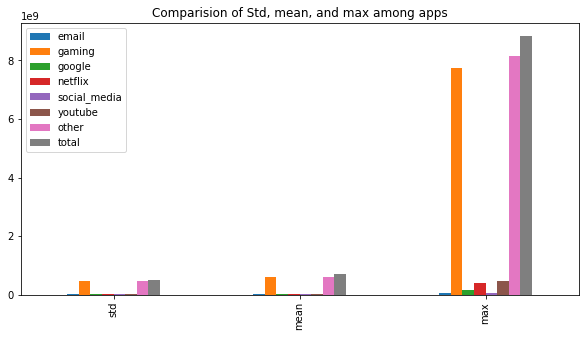

In [193]:

pd.DataFrame(total_data_volume.describe()).loc[["std","mean","max"]].plot(kind="bar",title="Comparision of Std, mean, and max among apps",figsize=(10,5))
plt.show()


## Task 1.2

For further analysis some of the columns are selected. These columns apply to our usecase and that is the basis for the selection.

In [194]:
cleaned_df["social_media"] = cleaned_df["social_media_dl_(bytes)"] + cleaned_df['social_media_ul_(bytes)']
cleaned_df["google"] = cleaned_df["google_dl_(bytes)"] + cleaned_df["google_ul_(bytes)"]
cleaned_df['email'] = cleaned_df["email_dl_(bytes)"] + cleaned_df["email_ul_(bytes)"]
cleaned_df['youtube'] = cleaned_df["youtube_dl_(bytes)"] + cleaned_df["youtube_ul_(bytes)"]
cleaned_df['netflix'] = cleaned_df["netflix_dl_(bytes)"] + cleaned_df["netflix_ul_(bytes)"]
cleaned_df["gaming"] = cleaned_df["gaming_dl_(bytes)"] + cleaned_df["gaming_ul_(bytes)"]
cleaned_df['other']= cleaned_df["other_dl_(bytes)"]+ cleaned_df["other_ul_(bytes)"]
cleaned_df['total_data'] = cleaned_df['total_dl_(bytes)'] + cleaned_df['total_ul_(bytes)']

In [195]:

explore_feature_df=cleaned_df[[ 'msisdn/number', 'last_location_name',
                        'handset_manufacturer', 'handset_type', 'dur._(ms)', 
                        'social_media', 'google', 'email', 'youtube', 'netflix',
                        'gaming','other', 'total_data'
                    ]]

In [196]:
explore_feature_df=explore_feature_df.rename(columns={"msisdn/number":"msisdn","handset_manufacturer":"manufacturer","last_location_name":"location","dur._(ms)":"dur_ms"})
explore_feature_df.head()

,msisdn,location,manufacturer,handset_type,dur_ms,social_media,google,email,youtube,netflix,gaming,other,total_data
0,33664962239.0,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,33681854413.0,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,33760627129.0,D42335A,Samsung,Samsung Galaxy A8 (2018),1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,33750343200.0,T21824A,undefined,undefined,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,33699795932.0,D88865A,Samsung,Samsung Sm-G390F,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


### Non-graphical Univariate Analysis

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

In [199]:
quanititative_analysis= explore_feature_df[['dur_ms','email','google','gaming','netflix','social_media','youtube','other','total_data']]
quanititative_analysis.describe()

,dur_ms,email,google,gaming,netflix,social_media,youtube,other,total_data
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046084e+05,2.259102e+06,7.807295e+06,4.303331e+08,2.262861e+07,1.828250e+06,2.264348e+07,4.293653e+08,4.957646e+08
std,8.103736e+04,1.071109e+06,3.516420e+06,2.440199e+08,9.260820e+06,1.035646e+06,9.246800e+06,2.432681e+08,2.443810e+08
min,7.142000e+03,8.359000e+03,4.033000e+04,3.063580e+05,9.843200e+04,1.563000e+03,7.890300e+04,1.490450e+05,2.895611e+07
25%,5.744200e+04,1.359344e+06,4.943599e+06,2.187279e+08,1.597946e+07,9.322180e+05,1.599846e+07,2.185534e+08,2.844764e+08
50%,8.639900e+04,2.263567e+06,7.812835e+06,4.316150e+08,2.263554e+07,1.826471e+06,2.266177e+07,4.299865e+08,4.968610e+08
75%,1.324300e+05,3.159818e+06,1.068280e+07,6.414159e+08,2.929044e+07,2.727487e+06,2.929260e+07,6.399275e+08,7.065054e+08
max,1.859336e+06,4.518036e+06,1.552878e+07,8.592028e+08,4.519815e+07,3.650861e+06,4.519008e+07,8.595209e+08,9.559848e+08


### Graphical Univariate Analysis

In [216]:
numeric_columns = cleaner.get_numerical_columns(cleaned_df)
numeric_df= cleaned_df[numeric_columns]


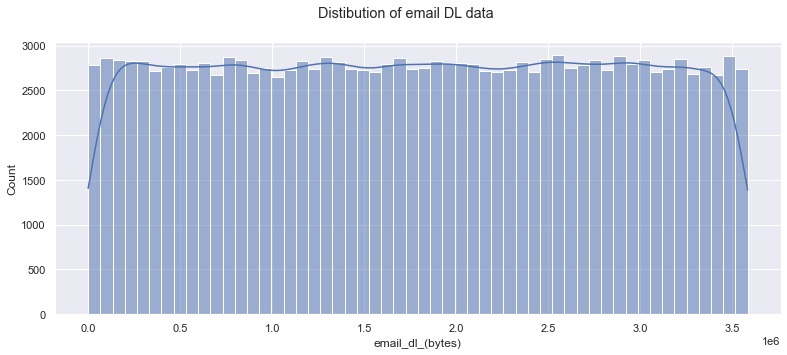

In [217]:
sns.set(rc={'figure.figsize':(13,5)})
sns.histplot(numeric_df["email_dl_(bytes)"],kde=True)
plt.suptitle("Distibution of email DL data")
plt.show()

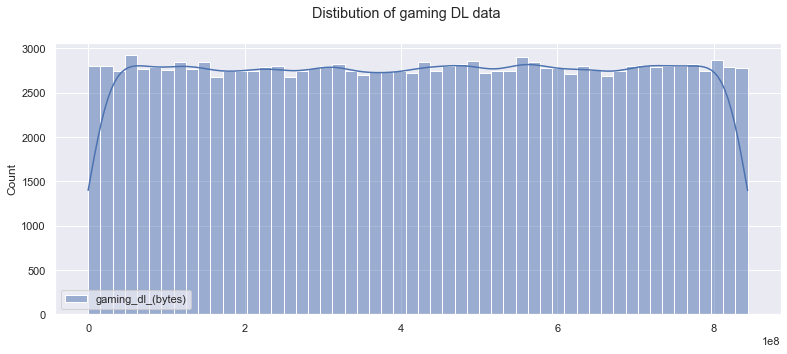

In [224]:
sns.set(rc={'figure.figsize':(13,5)})
sns.histplot(numeric_df[["gaming_dl_(bytes)"]],kde=True)
plt.suptitle("Distibution of gaming DL data")
plt.show()

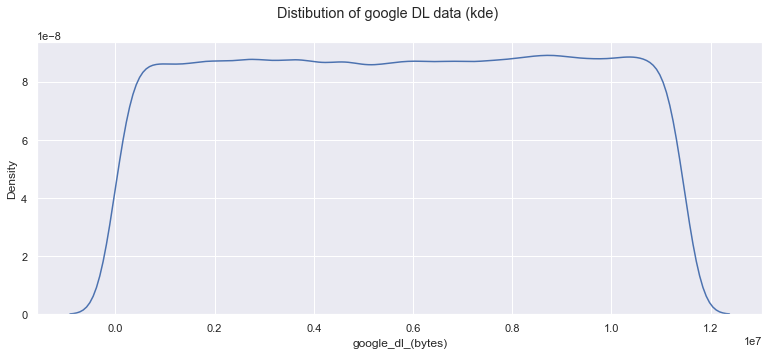

In [228]:
sns.set(rc={'figure.figsize':(13,5)})
sns.kdeplot(numeric_df["google_dl_(bytes)"])
plt.suptitle("Distibution of google DL data (kde)")
plt.show()

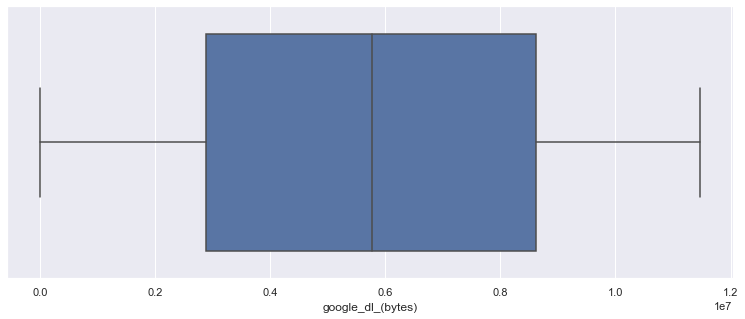

In [255]:
plt.figure(figsize=(13,5))
sns.boxplot(data=numeric_df[['google_dl_(bytes)']],x="google_dl_(bytes)")
plt.show()

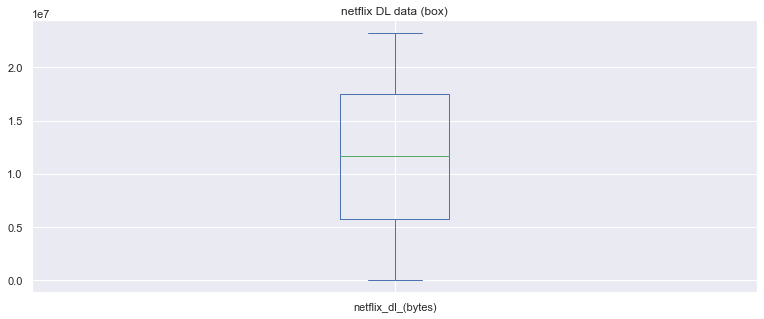

In [247]:
numeric_df[["netflix_dl_(bytes)"]].plot.box(title="netflix DL data (box)")
plt.show()

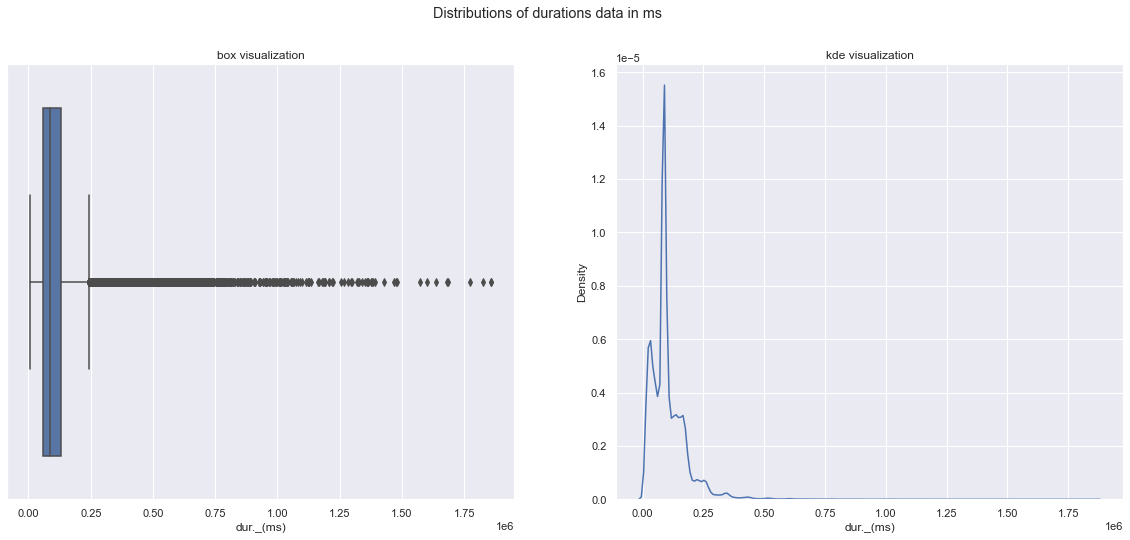

In [253]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1,title="box visualization")
sns.boxplot(data=numeric_df[['dur._(ms)']],x="dur._(ms)")
plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(numeric_df["dur._(ms)"])
plt.suptitle("Distributions of durations data in ms")
plt.show()

we can understand that from the above chart, there exists outliers in duration data